In [5]:
! mkdir -p ./kaggle/

In [6]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:10<00:00, 221MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [9]:
!unzip /content/dogs-vs-cats.zip -d/content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np

from  keras.utils import plot_model
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import seaborn as sna
from  tensorflow.keras.preprocessing.image import  img_to_array,load_img,ImageDataGenerator


In [10]:
cat_directory_path='/content/dogs_vs_cats/train/cats'
dog_directory_path='/content/dogs_vs_cats/train/dogs'

In [11]:
print(len(os.listdir(cat_directory_path)))
print(len(os.listdir(dog_directory_path)))

10000
10000


array([[[ 75, 112, 140],
        [ 75, 112, 140],
        [ 79, 116, 144],
        ...,
        [ 54,  77, 127],
        [ 58,  77, 120],
        [ 32,  49,  88]],

       [[ 71, 108, 136],
        [ 72, 109, 137],
        [ 78, 115, 143],
        ...,
        [ 56,  79, 129],
        [ 68,  87, 130],
        [ 22,  39,  78]],

       [[ 53,  88, 114],
        [ 55,  90, 116],
        [ 63,  98, 124],
        ...,
        [ 44,  67, 117],
        [ 70,  89, 134],
        [  3,  21,  62]],

       ...,

       [[ 68,  78,  85],
        [ 55,  65,  72],
        [ 43,  54,  62],
        ...,
        [ 52,  80,  91],
        [ 54,  78,  90],
        [ 55,  79,  91]],

       [[ 56,  66,  73],
        [ 46,  56,  63],
        [ 39,  50,  58],
        ...,
        [ 70,  98, 109],
        [ 66,  90, 102],
        [ 61,  85,  97]],

       [[ 49,  59,  66],
        [ 42,  52,  59],
        [ 38,  49,  57],
        ...,
        [ 70,  98, 109],
        [ 59,  83,  95],
        [ 54,  78,  90]]], dtype=uint8)
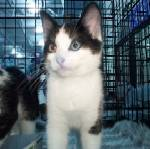

In [12]:
cat_image='/content/dogs_vs_cats/train/cats/cat.1000.jpg'
import cv2
img=cv2.imread(cat_image)
img

# building model

In [13]:
base_dir='/content/dogs_vs_cats/train'
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [14]:
train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

Found 4000 images belonging to 2 classes.


In [15]:
validation_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 4000 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [17]:
model=models.Sequential([
    # layer 1
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    #layer 2
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    #layer 3
    layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    #layer 4
    layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')


])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.5047 - loss: 0.6973 - val_accuracy: 0.6083 - val_loss: 0.6911
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.5452 - loss: 0.6900 - val_accuracy: 0.6068 - val_loss: 0.6570
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.6104 - loss: 0.6454 - val_accuracy: 0.5555 - val_loss: 0.6812
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6248 - loss: 0.6446 - val_accuracy: 0.6765 - val_loss: 0.5909
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.6305 - loss: 0.6148 - val_accuracy: 0.6957 - val_loss: 0.6034
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.7038 - loss: 0.5634 - val_accuracy: 0.7308 - val_loss: 0.5223
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.7543 - loss: 0.5022 - val_accuracy: 0.7770 - val_loss: 0.4664
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.7745 - loss: 0.4716 - val_accuracy: 0.808

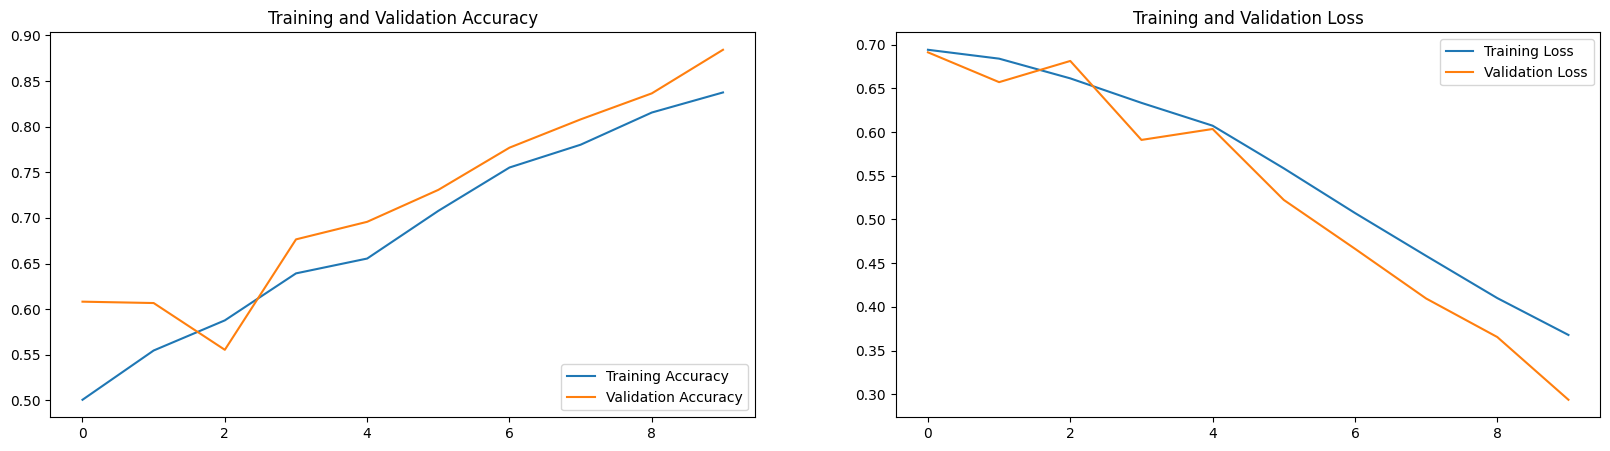

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = '/content/dogs_vs_cats/test'
test_generator = test_datagen.flow_from_directory(
     test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # We do not need the labels here
    shuffle=False)  # Do not shuffle to maintain the order of files

Found 5000 images belonging to 2 classes.


In [23]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 292ms/step - accuracy: 0.7468 - loss: 0.5189
Test Loss: 0.48425430059432983
Test Accuracy: 0.7770000100135803


In [24]:
  # Get the true labels from the test generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

NameError: name 'predicted_classes' is not defined

In [25]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)


    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')


    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: [[0.09631137]]


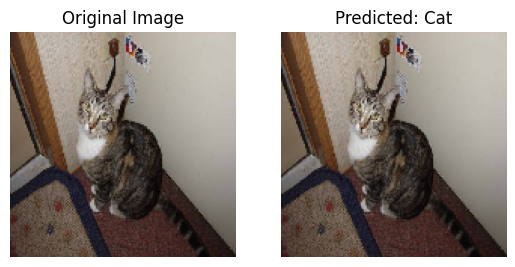

In [28]:
img_path = '/content/dogs_vs_cats/test/cats/cat.10109.jpg'
make_prediction(img_path)